# BIL 366 Data Mining: Homework-1
### Bilinmesi gerekenler
data exploration,
pandas,numpy, matplotlib.pyplot
### Öğrenme Hedefleri 
Pandas kullanılarak temel data exploration ve visualization


### Giriş
Covid süresince Türkiye location datasından Google'in elde etmiş olduğu mobility datası https://www.google.com/covid19/mobility/ sitesi üzerinden yayınlanmıştır.
Bu ödevde sizden bu datayla ilgili önanaliz yapıp raporlamanız istenmektedir. Datayı indirme ve yüklemede bir bütünlük olması açısından bu datayı drive üzerinden erişime açtım, aşağıdaki şekilde erişebilirsiniz.



In [1]:
import pandas as pd

#https://www.google.com/covid19/mobility/
url='https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

### Yapılacaklar

####1.
Data üzerinde 5li özet istatiski bilgileri gösteriniz. 

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

#https://www.google.com/covid19/mobility/
url='https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
file = pd.read_csv(url2)
data = DataFrame(file)

data.rename(columns={
 'retail_and_recreation_percent_change_from_baseline': "Retail and Recreation",
 'grocery_and_pharmacy_percent_change_from_baseline': "Grocery and Pharmacy",
 'parks_percent_change_from_baseline': "Parks",
 'transit_stations_percent_change_from_baseline': "Transit Stations",
 'workplaces_percent_change_from_baseline': "Workplaces",
 'residential_percent_change_from_baseline': "Residential"}, inplace=True)

In [3]:
for i in range(9, 15):
        print(data.columns[i])
        print('\t Count = %.2f' % data.iloc[:, i].count())
        print('\t Mean = %.2f' % data.iloc[:, i].mean())
        print('\t Standard deviation = %.2f' % data.iloc[:, i].std())
        print('\t Minimum = %.2f' % data.iloc[:, i].min())
        print('\t Maximum = %.2f' % data.iloc[:, i].max())

Retail and Recreation
	 Count = 101865.00
	 Mean = -26.76
	 Standard deviation = 30.13
	 Minimum = -100.00
	 Maximum = 333.00
Grocery and Pharmacy
	 Count = 106104.00
	 Mean = 2.70
	 Standard deviation = 32.58
	 Minimum = -100.00
	 Maximum = 321.00
Parks
	 Count = 95186.00
	 Mean = 5.78
	 Standard deviation = 53.05
	 Minimum = -100.00
	 Maximum = 694.00
Transit Stations
	 Count = 87723.00
	 Mean = -25.23
	 Standard deviation = 35.33
	 Minimum = -100.00
	 Maximum = 318.00
Workplaces
	 Count = 158870.00
	 Mean = -19.00
	 Standard deviation = 21.56
	 Minimum = -94.00
	 Maximum = 136.00
Residential
	 Count = 98651.00
	 Mean = 6.99
	 Standard deviation = 8.72
	 Minimum = -28.00
	 Maximum = 50.00


####2.
Bu datadaki [9-14] sütunlarını birbirlerine karşı scatter plot ile çizerek aralarında herhangi bir correlation(positive, negative, none) olup olmadığını belirleyiniz. (fig, axs = plt.subplots(5,3) kullanabilirsiniz) 

,Retail and Recreation,Grocery and Pharmacy,Parks,Transit Stations,Workplaces,Residential
Retail and Recreation,1.000000,0.764389,0.739747,0.744815,0.800000,-0.793602
Grocery and Pharmacy,0.764389,1.000000,0.633028,0.599916,0.622464,-0.525961
Parks,0.739747,0.633028,1.000000,0.668896,0.563970,-0.644024
Transit Stations,0.744815,0.599916,0.668896,1.000000,0.606029,-0.649099
Workplaces,0.800000,0.622464,0.563970,0.606029,1.000000,-0.781809
Residential,-0.793602,-0.525961,-0.644024,-0.649099,-0.781809,1.000000


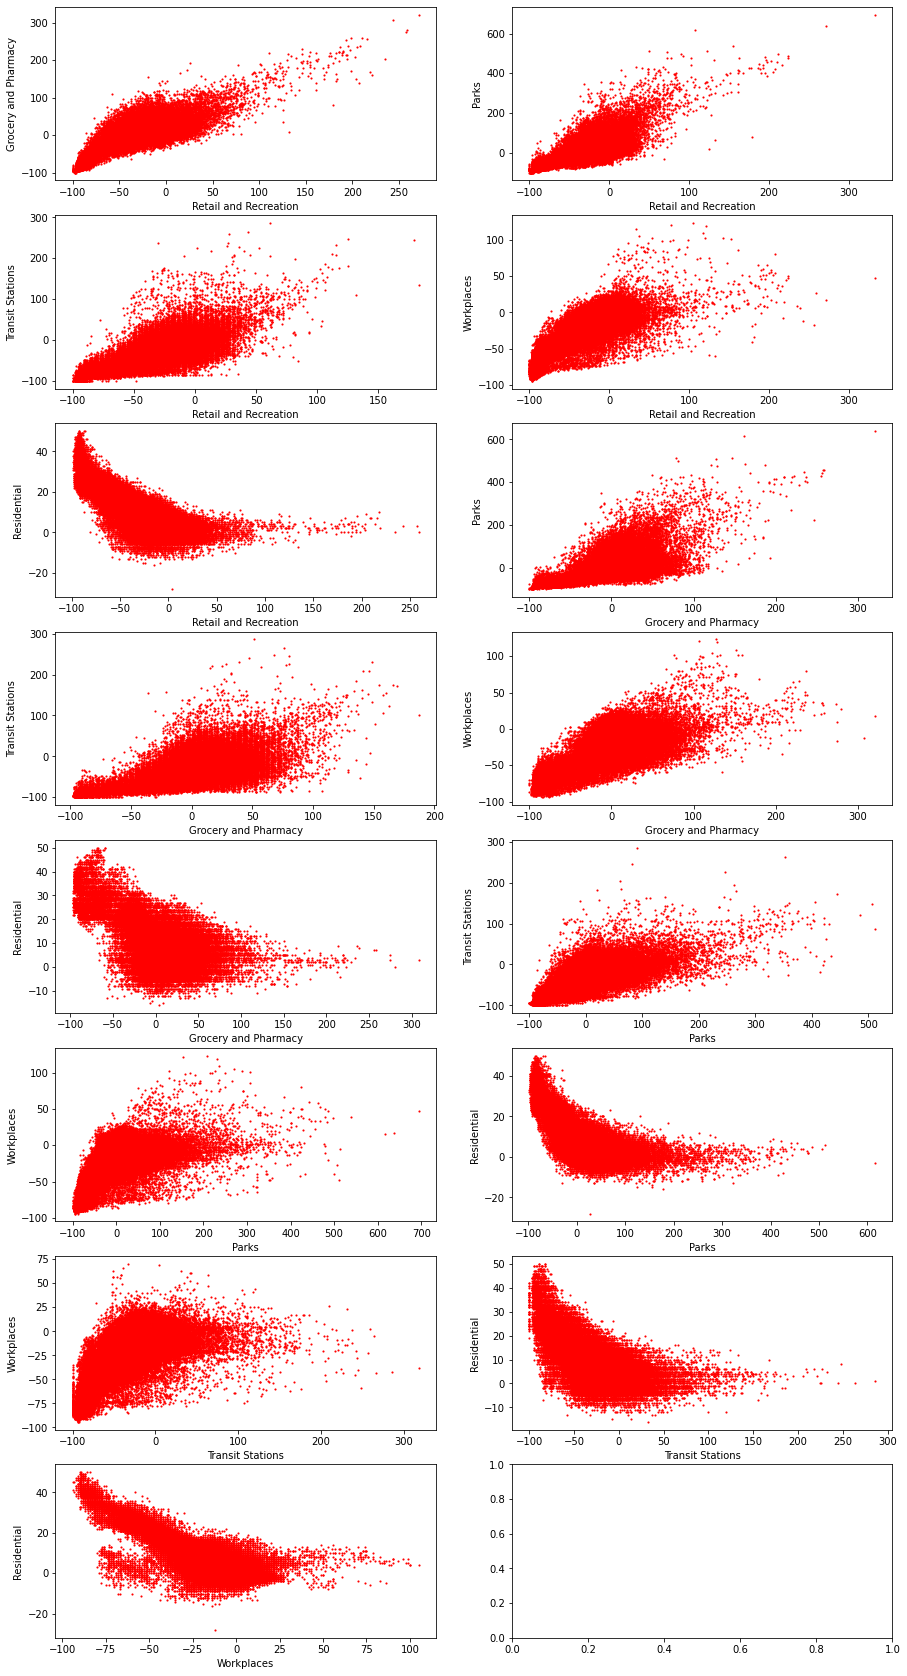

In [4]:
fig, axes = plt.subplots(8,2, figsize=(15,30))
index = 0

for i in range(9,14):
    for j in range(i+1,15):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], marker=".", s=5**1, color = 'red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1
cols = data[['Retail and Recreation',
 'Grocery and Pharmacy',
 'Parks',
 'Transit Stations',
 'Workplaces',
 'Residential']]
cols.corr()

Retail and Recreation - Grocery and Pharmacy --> Low positive correlation

Retail and Recreation - Parks --> Low positive correlation

Retail and Recreation - Transit Stations --> Low positive correlation

Retail and Recreation - Workplaces --> Low positive correlation

Retail and Recreation - Residential --> High negative correlation

Grocery and Pharmacy - Parks --> Low positive correlation

Grocery and Pharmacy -Transit Stations --> Low positive correlation

Grocery and Pharmacy - Workplaces --> Low positive correlation

Grocery and Pharmacy - Residential --> Low negative correlation

Parks - Transit Stations --> Low positive correlation

Parks - Workplaces --> Low positive correlation

Parks - Residential --> Low negative correlation

Transit Stations - Workplaces --> Low positive correlation

Transit Stations - Residential --> Low negative correlation

Workplaces - Residential --> High negative correlation

####3.
Bu datadaki [9-14] sütunlarını boxplot ile çizirek hangi sütünda outlier olup olmadığını belirleyiniz.
  
  Örnek 
  
 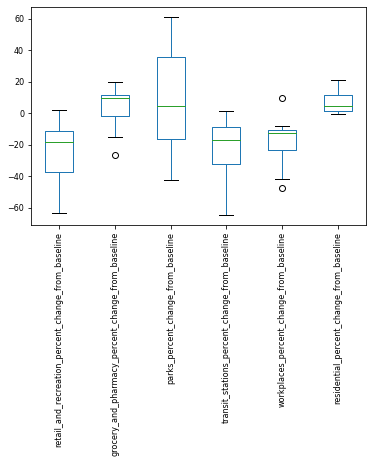



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


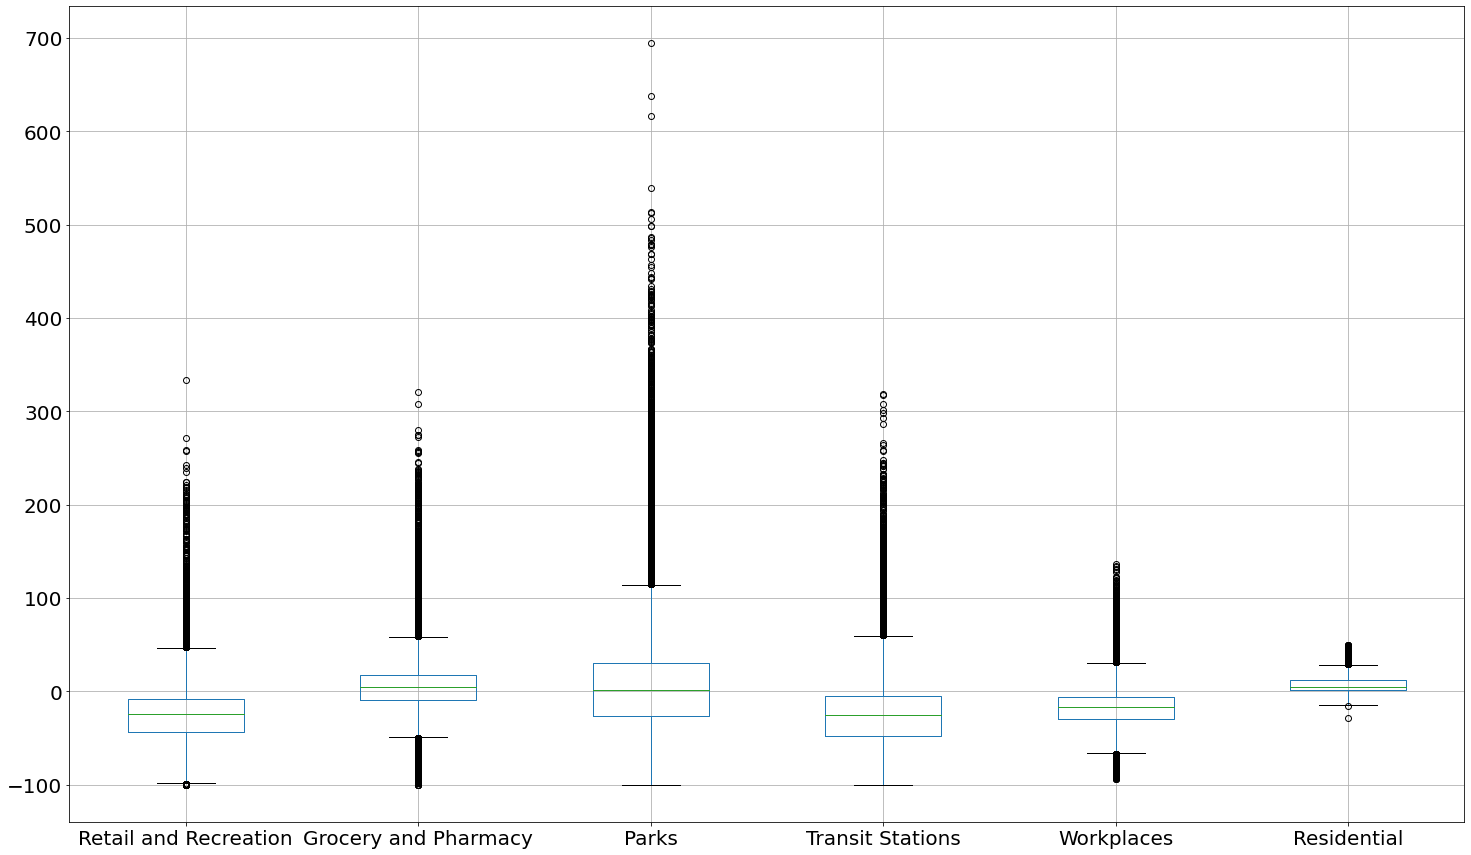

In [9]:
data.boxplot(column=['Retail and Recreation',
 'Grocery and Pharmacy',
 'Parks',
 'Transit Stations',
 'Workplaces',
 'Residential'], figsize=(25,15), fontsize=20)

####4.
Dataframe'i 8.sütun ('date') sütununda aylara göre gruplayarak [9-14] sütunlarını aşağıdakine benzer şekilde plot ediniz (groupby ve DatetimeIndex kullanarak yapabilirsiniz).

Örnek
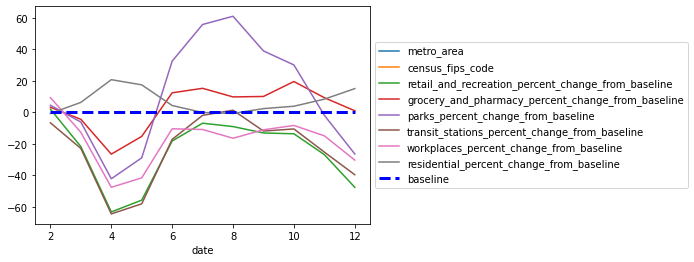




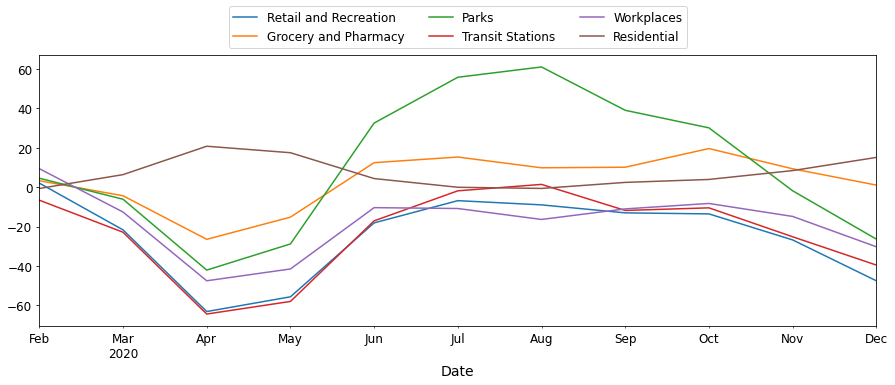

In [25]:
data.index = pd.to_datetime(data['date'])

for i in range(9,15):
    monthly = data.iloc[:, i].groupby(pd.Grouper(freq='M')).mean()
    ax = monthly.plot(figsize=(15,5), fontsize = 12)
    plt.xlabel("Date", fontsize= 14)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),ncol=3, fontsize= 12)

####5.
https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing  adresinde 2021 TR datası vardır. Bu datayıda 4.deki gibi gruplayarak, her iki datayı karşılaştırmak için aynı indeksli sütunlarını aylara göre aynı plotta gösteriniz. 

Örnek

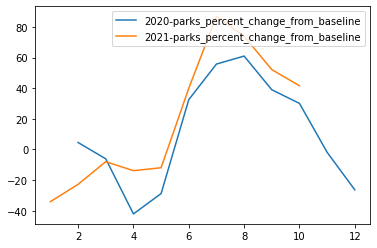

In [7]:
url3='https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url4='https://drive.google.com/uc?id=' + url.split('/')[-2]

data_1 = pd.read_csv(url4, header='infer')

data_1.rename(columns={
 'retail_and_recreation_percent_change_from_baseline': "Retail and Recreation",
 'grocery_and_pharmacy_percent_change_from_baseline': "Grocery and Pharmacy",
 'parks_percent_change_from_baseline': "Parks",
 'transit_stations_percent_change_from_baseline': "Transit Stations",
 'workplaces_percent_change_from_baseline': "Workplaces",
 'residential_percent_change_from_baseline': "Residential"}, inplace=True)

data_1.index = pd.to_datetime(data_1['date'])

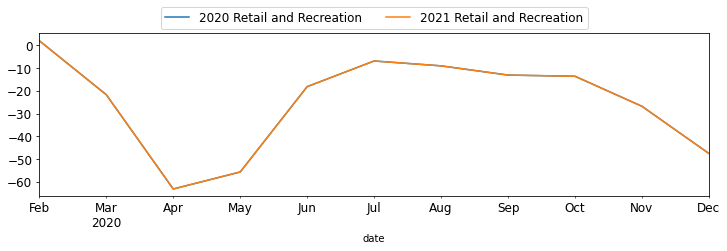

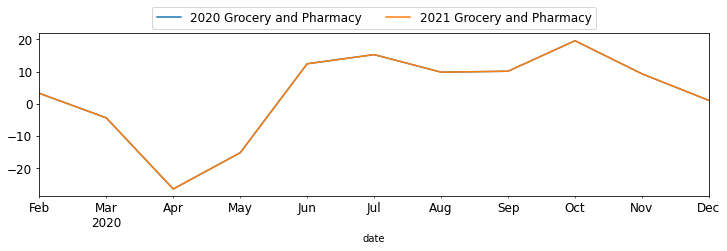

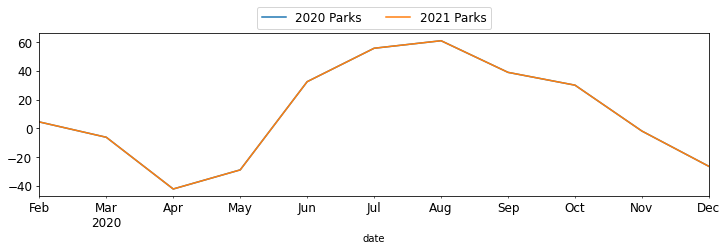

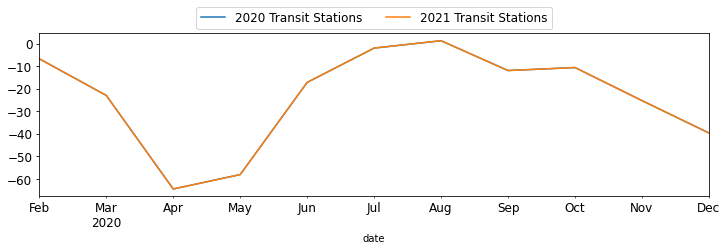

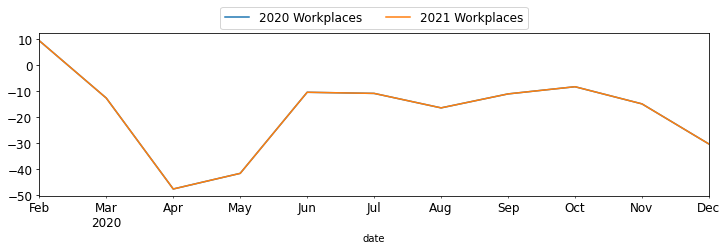

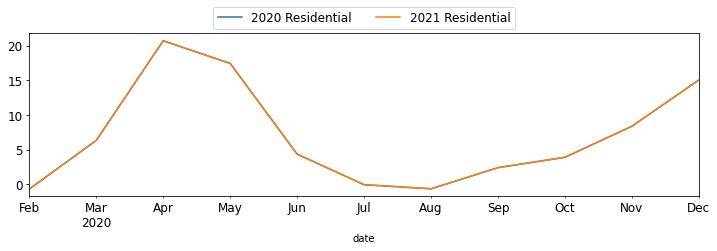

In [24]:
for i in range(9,15):
    
    monthly = data.iloc[:, i].groupby(pd.Grouper(freq='M')).mean()
    monthly_1 = data_1.iloc[:, i].groupby(pd.Grouper(freq='M')).mean()
    
    monthly.plot(figsize=(12,3), label="2020 "+data.columns[i], fontsize = 12)
    monthly_1.plot(label="2021 "+data.columns[i])
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),ncol=3, fontsize= 12)
    plt.show()

### Teslim
Her sorunun altında **hem kodu ve hemde çıktısını** içeren Jupiter notebook dökümanını **pdfe** çevirerek classroom üzerinden teslim ediniz(colab de direk print ile pdf alabilirsiniz).


### Değerlendirme
**Her soru 20 puandır.**